In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from analysis_tools import get_dist_matrix, PCA_on_dists, load_model, get_latent, PCA_on_latent


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataname = 'datagen_fhn_pool_1000.hdf5'
model_folder = 'train1e4_gpu_b1e3_lr4_d6_nlin_e2e4'
#model_folder = 'train1e4_gpu_b1e3_lr4_linear'
#model_folder = "test100cpu"
model_file = model_folder + '/model.pt'
model_loss = model_folder + '/loss.pt'


num_reads = 100

model = load_model(model_file)
loss = torch.load(model_loss)
dists, parameters = get_dist_matrix(dataname, model, num_reads)
latent, parameters2 = get_latent(dataname, model, num_reads)

Text(0.5, 0, 'Epoch')

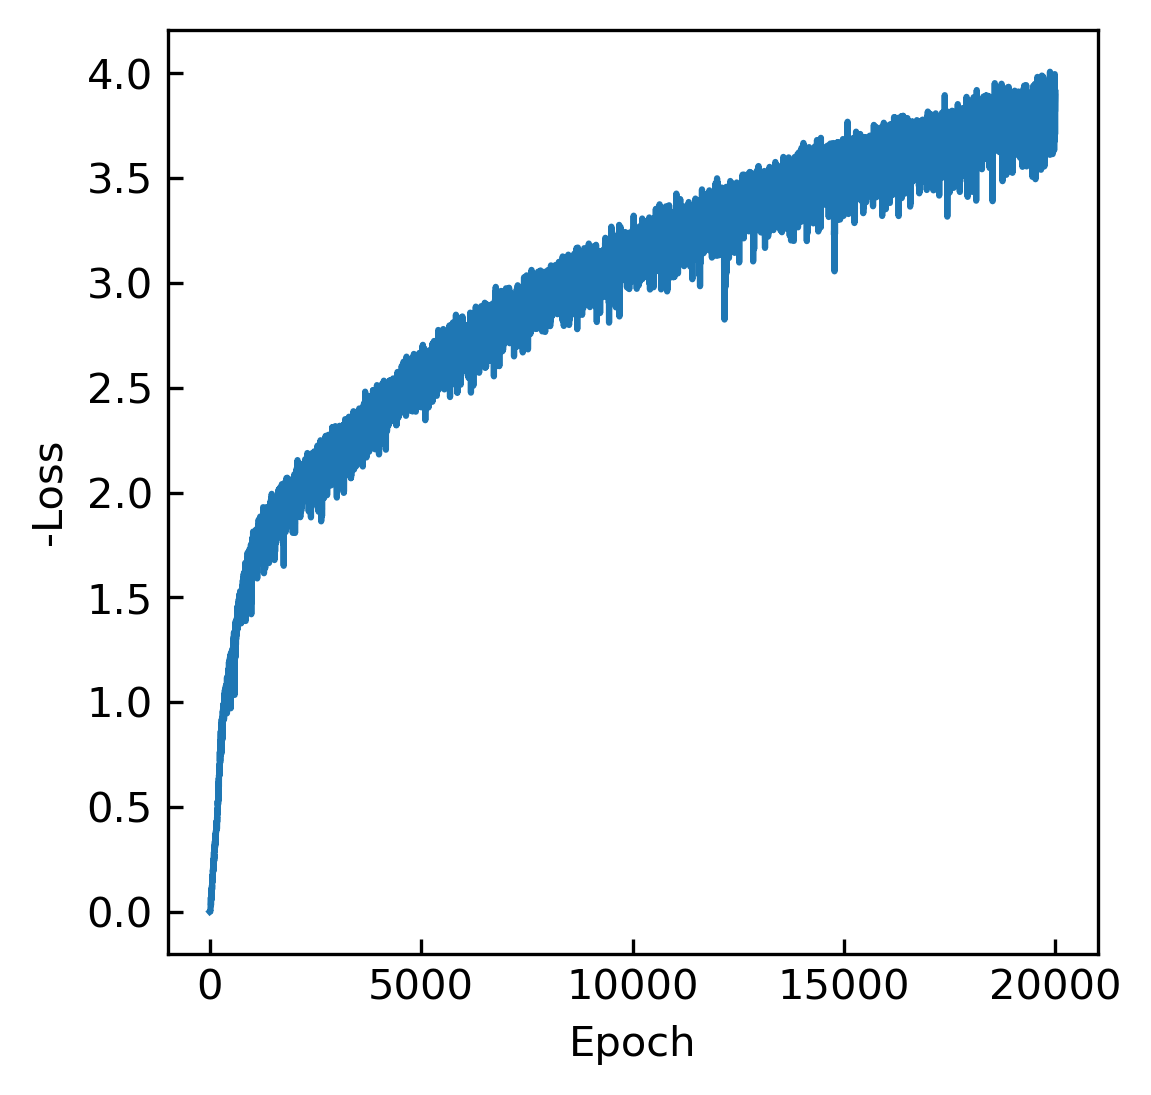

In [3]:
plt.figure(figsize=(4,4), dpi=300)
plt.plot(-loss)
plt.ylabel("-Loss")
plt.xlabel("Epoch")

In [4]:
print(dists.shape)

(400, 400)


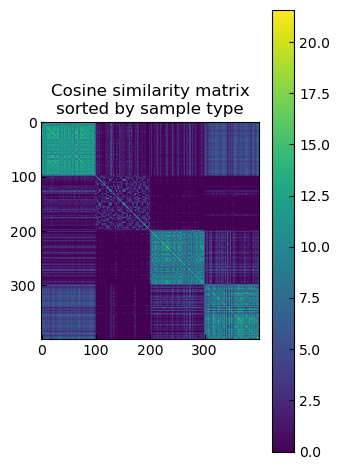

In [5]:
plt.figure()
cmap = plt.get_cmap('bwr')  # viridis is the default colormap for imshow
cmap = plt.get_cmap('viridis')
#cmap.set_bad(color='white')
#sorted_idx, clustered_arr = cluster_corr(dists)
plt.subplot(1,2,1)
plt.title("Cosine similarity matrix\nsorted by sample type")
plt.imshow(dists, cmap=cmap)
#for jj in range(1,4):
#    plt.axhline(jj*(num_reads+0.5), color='w', linewidth=0.5)
#    plt.axvline(jj*(num_reads+0.5), color='w', linewidth=0.5)

#plt.colorbar()
#plt.subplot(1,2,2)
#plt.title("MI matrix sorted \n by automatic clustering")
#plt.imshow(clustered_arr, cmap=cmap)

plt.colorbar()
plt.tight_layout()

In [6]:
X_pca, explained_variance_ratio, pca = PCA_on_dists(dists)

/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [7]:
labels_list = [p[-1] for p in parameters]

Text(0, 0.5, 'Explained variance')

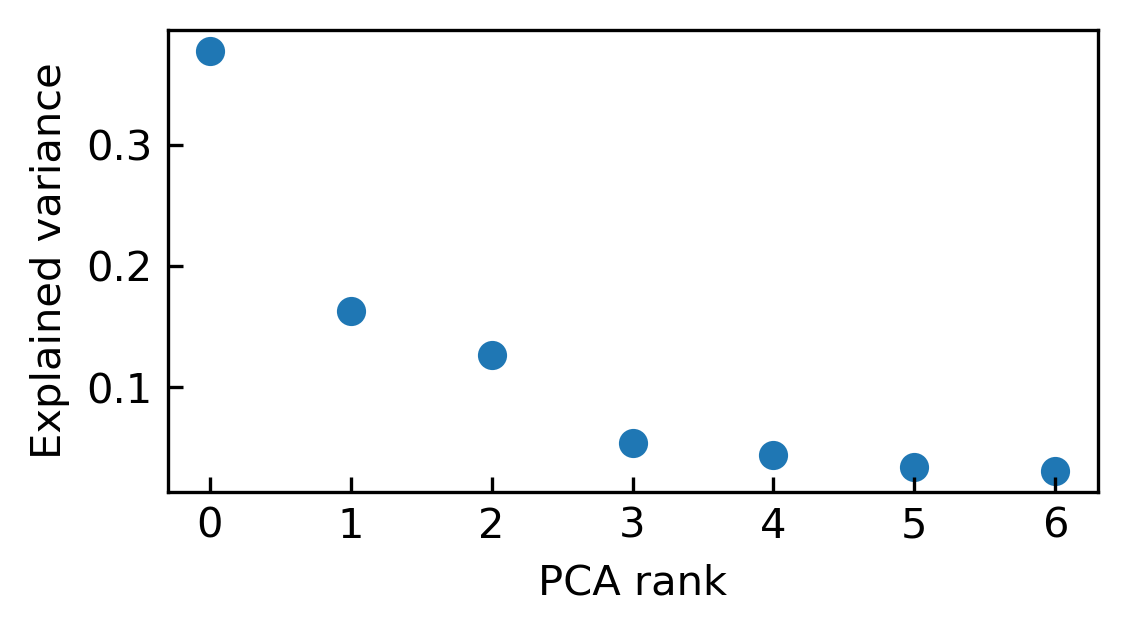

In [8]:
plt.figure(figsize=(4,2), dpi=300)
plt.scatter(np.arange(len(explained_variance_ratio)), explained_variance_ratio )
plt.xlabel('PCA rank')
plt.ylabel('Explained variance')

Text(0.5, 0, 'PCA 3')

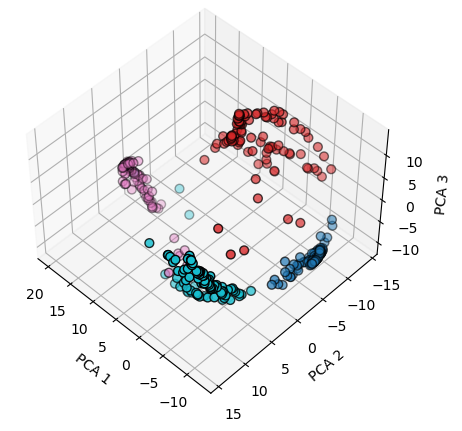

In [9]:
plt.figure(figsize=(5,5))
cm = plt.cm.bwr(np.linspace(0, 1, len(labels_list)))
ax = plt.gcf().add_subplot(projection='3d', elev=48, azim=134)
#ax.plot(X_pca[:,0], X_pca[:,1], X_pca[:,2], color='k', alpha=0.3)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],s= 40, c=np.array(labels_list), cmap=plt.cm.tab10, edgecolor="k")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
ax.set_zlabel("PCA 3")

Text(0, 0.5, 'PCA 2')

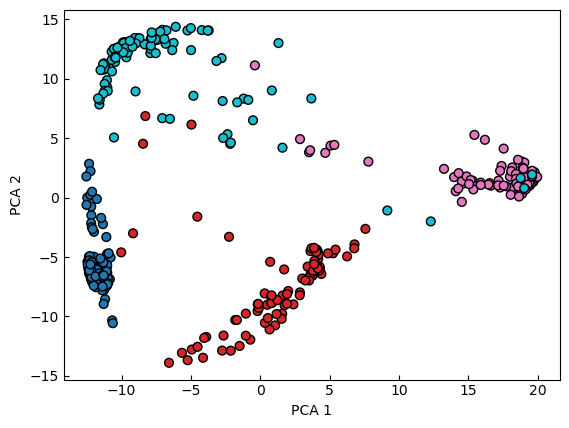

In [10]:

plt.figure()
#plt.plot(X_pca[:,0], X_pca[:,1], color='k', alpha=0.3) #cmap=plt.cm.winter
plt.scatter(X_pca[:,0], X_pca[:,1],s=40, c=np.array(labels_list[:]), cmap=plt.cm.tab10, edgecolor="k")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSN

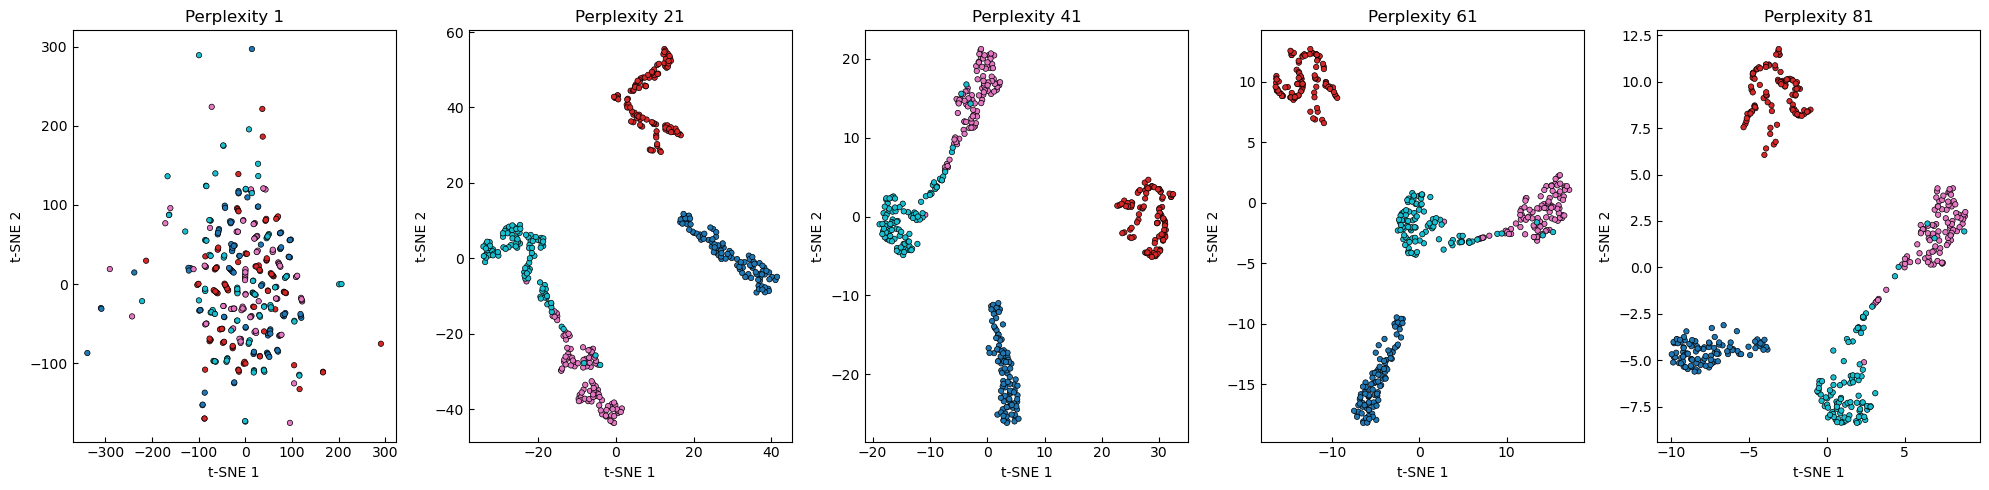

In [11]:
from sklearn import manifold
plt.figure(figsize=(20, 5))
perplexities = np.arange(1, num_reads, num_reads//5)
for i, perp in enumerate(perplexities):
    plt.subplot(1, len(perplexities), i+1)
    tsne = manifold.TSNE(
            n_components=2,
            init="random",
            random_state=0,
            perplexity=perp,
            n_iter=2000,
        )
    Y = tsne.fit_transform(dists)

    plt.scatter(Y[:,0], Y[:,1], 15, np.array(labels_list), cmap=plt.cm.tab10, edgecolors='k', linewidths=0.5)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('Perplexity {0}'.format(perp))
plt.tight_layout()

In [12]:
latent.shape

torch.Size([400, 128])

In [13]:
from sklearn import decomposition, preprocessing
from sklearn import manifold
from sklearn.decomposition import PCA

def PCA_on_latent(latents):
    latents_scaled = preprocessing.scale(latents, axis=1)
    pca = decomposition.PCA(n_components=7)
    pca.fit(latents_scaled)
    X_pca = pca.transform(latents_scaled)
    return X_pca, pca.explained_variance_ratio_, pca

In [14]:
latent_pca, latent_explained_variance, latent_pca_transform = PCA_on_latent(latent.detach().numpy())

/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Text(0, 0.5, 'Explained variance')

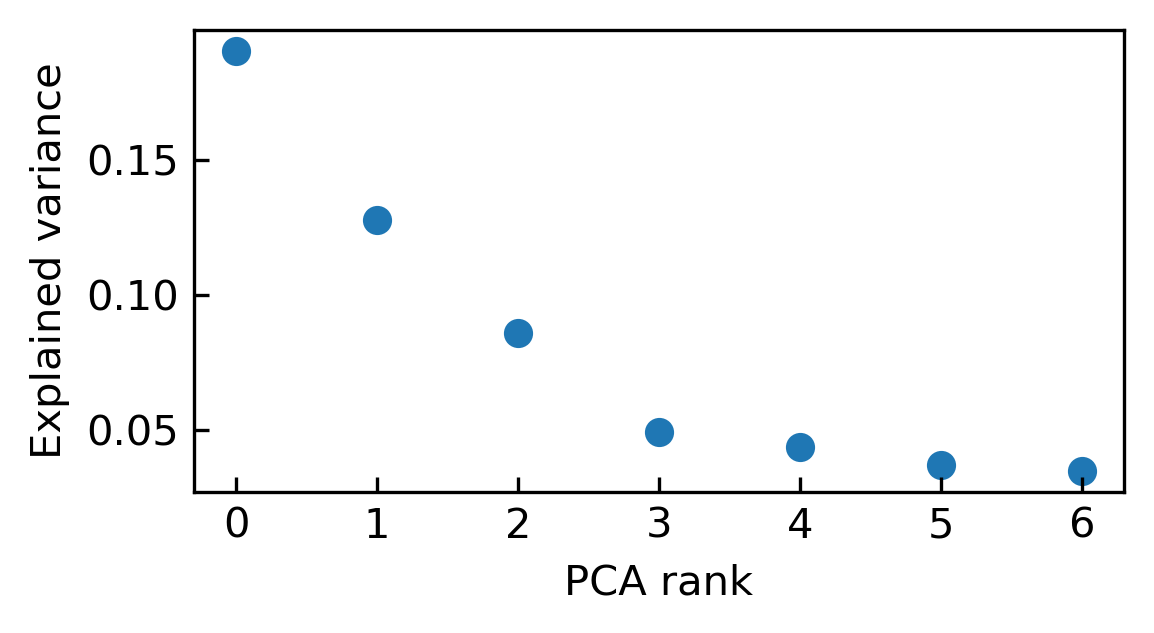

In [15]:
plt.figure(figsize=(4,2), dpi=300)
plt.scatter(np.arange(len(latent_explained_variance)), latent_explained_variance)
plt.xlabel('PCA rank')
plt.ylabel('Explained variance')

Text(0, 0.5, 'PCA 2')

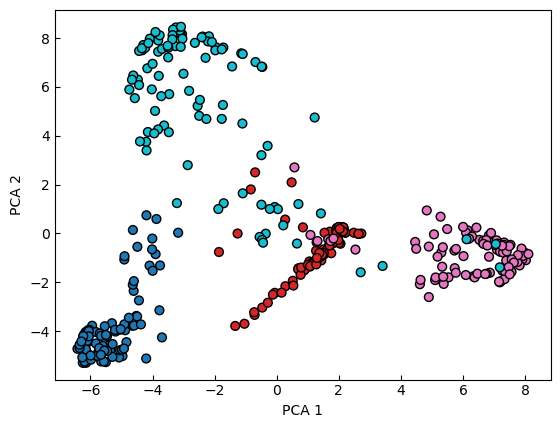

In [16]:

plt.figure()
#plt.plot(X_pca[:,0], X_pca[:,1], color='k', alpha=0.3) #cmap=plt.cm.winter
plt.scatter(latent_pca[:,0], latent_pca[:,1],s=40, c=np.array(labels_list[:]), cmap=plt.cm.tab10, edgecolor="k")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

Text(0.5, 0, 'PCA 3')

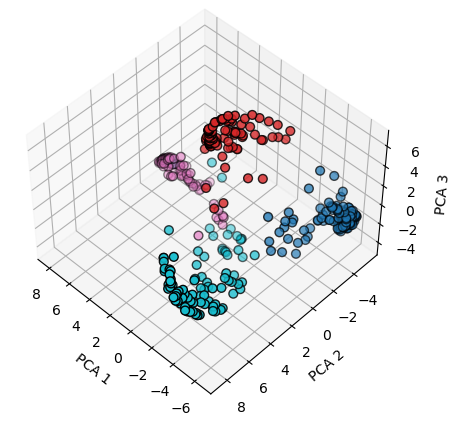

In [17]:
plt.figure(figsize=(5,5))
cm = plt.cm.bwr(np.linspace(0, 1, len(labels_list)))
ax = plt.gcf().add_subplot(projection='3d', elev=48, azim=134)
#ax.plot(X_pca[:,0], X_pca[:,1], X_pca[:,2], color='k', alpha=0.3)
ax.scatter(latent_pca[:,0], latent_pca[:,1], latent_pca[:,2],s= 40, c=np.array(labels_list), cmap=plt.cm.tab10, edgecolor="k")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
ax.set_zlabel("PCA 3")

/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSN

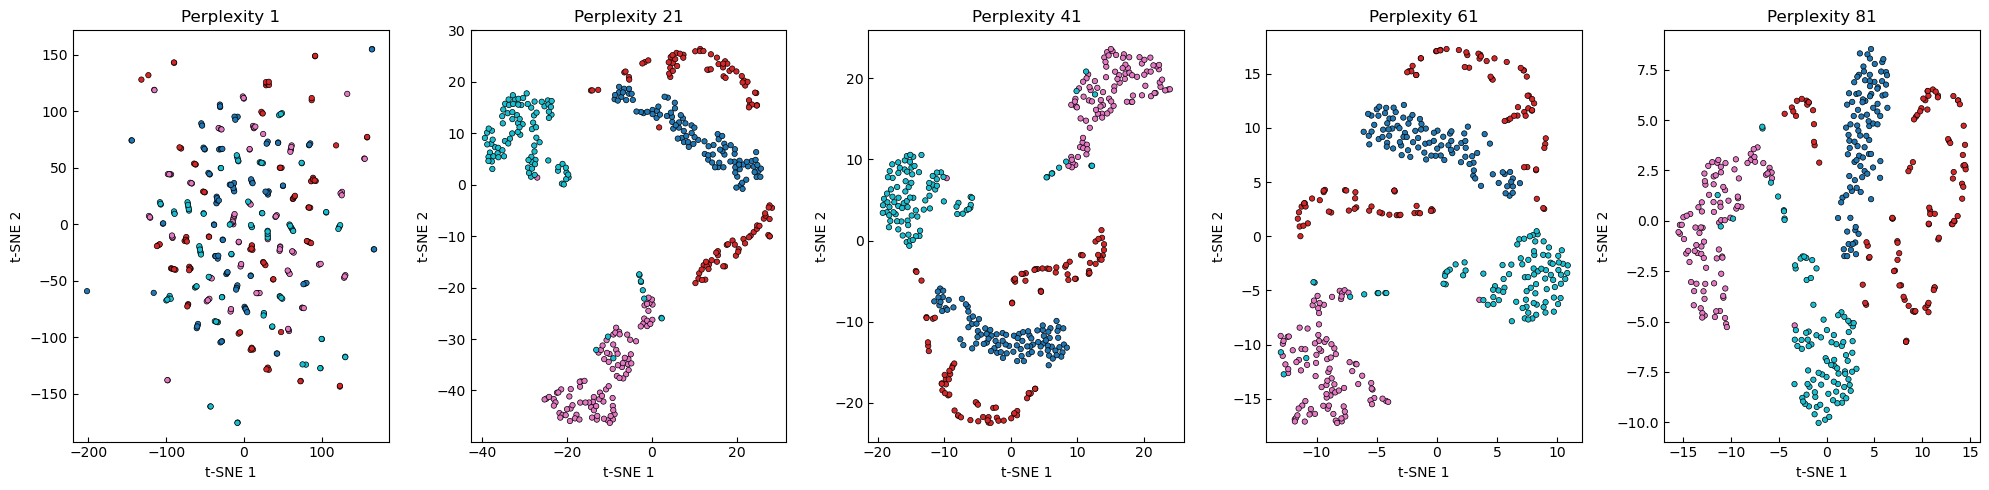

In [18]:
from sklearn import manifold
plt.figure(figsize=(20, 5))
perplexities = np.arange(1, num_reads, num_reads//5)
for i, perp in enumerate(perplexities):
    plt.subplot(1, len(perplexities), i+1)
    tsne = manifold.TSNE(
            n_components=2,
            init="random",
            random_state=0,
            perplexity=perp,
            n_iter=2000,
        )
    Y = tsne.fit_transform(latent.detach().numpy())

    plt.scatter(Y[:,0], Y[:,1], 15, np.array(labels_list), cmap=plt.cm.tab10, edgecolors='k', linewidths=0.5)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title('Perplexity {0}'.format(perp))
plt.tight_layout()